In [1]:
#imports
import os

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn-whitegrid')

%matplotlib inline  

# ========================================================
# estilos de graficos :
# >>  https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# ========================================================
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('classic')
# plt.style.use('bmh')

In [9]:
# load dataset
# csv = '../data/_dados_extraidos__k_unordered [001] [0001] [00001] [002] [005].csv'
csv = '../data/_dados_para_analisar_2.csv'
df = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)
df.head(10)

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
0,merge,0.01,10000,90,962,9.62,0.90
1,merge,0.01,10000,66,974,9.74,0.66
2,merge,0.01,10000,66,974,9.74,0.66
3,merge,0.01,10000,67,1045,10.45,0.67
4,merge,0.01,10000,90,962,9.62,0.90
5,merge,0.01,10000,53,996,9.96,0.53
6,merge,0.01,10000,64,1068,10.68,0.64
7,merge,0.01,10000,64,1068,10.68,0.64
8,merge,0.01,10000,103,955,9.55,1.03
9,merge,0.01,10000,71,1000,10.00,0.71


In [10]:
df.describe()

,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.016220,4420.000000,783.781383,330.514367,8.137760,21.345590
std,0.018361,4567.925981,1917.557897,648.858816,8.010176,24.754423
min,0.000100,100.000000,7.000000,0.000000,0.000000,0.140000
25%,0.001000,1000.000000,28.000000,9.000000,0.900000,2.400000
50%,0.010000,1000.000000,76.000000,27.000000,5.790000,13.340000
75%,0.020000,10000.000000,351.000000,192.000000,14.000000,29.000000
max,0.050000,10000.000000,10000.000000,2890.000000,28.900000,100.000000


In [11]:
df['probabilidade_erro'].unique()

array([ 0.01  ,  0.05  ,  0.02  ,  0.0001,  0.001 ])

In [12]:
#Visualize data
#Let's Do Some Descriptive Analysis using
fig = plt.figure(figsize=[20,10])
df.describe().T

# ax = sns.distplot(df['probabilidade_erro'])

,count,mean,std,min,25%,50%,75%,max
probabilidade_erro,60000.0,0.016220,0.018361,0.0001,0.001,0.01,0.02,0.05
size_of_array,60000.0,4420.000000,4567.925981,100.0000,1000.000,1000.00,10000.00,10000.00
largest_sorted_subarray,60000.0,783.781383,1917.557897,7.0000,28.000,76.00,351.00,10000.00
k_unordered_sequence,60000.0,330.514367,648.858816,0.0000,9.000,27.00,192.00,2890.00
percentual_k_unordered,60000.0,8.137760,8.010176,0.0000,0.900,5.79,14.00,28.90
percentual_maior_array,60000.0,21.345590,24.754423,0.1400,2.400,13.34,29.00,100.00


In [13]:
#dimensao da matriz com os dados
print (df.shape)
print (df.index.size, df.columns.size)

(60000, 7)
60000 7


In [14]:
#ordena os dados por: 'algoritmo', 'probabilidade_erro', 'size_of_array'
df.sort_values(['algoritmo', 'probabilidade_erro', 'size_of_array'], ascending = [True, True, True], inplace = True)
df.head()

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
48000,bubble,0.0001,10000,9846,4,0.04,98.46
48001,bubble,0.0001,10000,6313,3,0.03,63.13
48002,bubble,0.0001,10000,5404,8,0.08,54.04
48003,bubble,0.0001,10000,9501,5,0.05,95.01
48004,bubble,0.0001,10000,9766,8,0.08,97.66


In [15]:
#quantas linhas existem para cada algoritmo
grp_algoritmo = df.groupby('algoritmo').size()
grp_algoritmo

algoritmo
bubble       15000
insertion    15000
merge        15000
quick        15000
dtype: int64

In [22]:
#quantas linhas existem para cada 'algoritmo', 'probabilidade_erro', 'size_of_array'
grp_algoritmo = df.groupby(['probabilidade_erro', 'size_of_array', 'algoritmo'] ).size()
grp_algoritmo

probabilidade_erro  size_of_array  algoritmo
0.0001              10000          bubble       3000
                                   insertion    3000
                                   merge        3000
                                   quick        3000
0.0010              1000           bubble       3000
                                   insertion    3000
                                   merge        3000
                                   quick        3000
0.0100              100            bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    1000           bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    10000          bubble       1000
                                   insertion    1000
 

In [20]:
#quantas linhas existem para cada 'probabilidade_erro'
grp_prob_erro = df.groupby(['probabilidade_erro']).size()
grp_prob_erro

probabilidade_erro
0.0001    12000
0.0010    12000
0.0100    12000
0.0200    12000
0.0500    12000
dtype: int64

In [18]:
#quantas linhas existem para cada 'probabilidade_erro','algoritmo','size_of_array'
grp_prob_erro = df.groupby(['probabilidade_erro','algoritmo','size_of_array']).size()
grp_prob_erro

probabilidade_erro  algoritmo  size_of_array
0.0001              bubble     10000            3000
                    insertion  10000            3000
                    merge      10000            3000
                    quick      10000            3000
0.0010              bubble     1000             3000
                    insertion  1000             3000
                    merge      1000             3000
                    quick      1000             3000
0.0100              bubble     100              1000
                               1000             1000
                               10000            1000
                    insertion  100              1000
                               1000             1000
                               10000            1000
                    merge      100              1000
                               1000             1000
                               10000            1000
                    quick      100              1000
 

In [19]:
#quantas linhas existem para cada 'size_of_array'
grp_size = df.groupby(['size_of_array']).size()
grp_size

size_of_array
100      12000
1000     24000
10000    24000
dtype: int64

In [23]:
#quantas linhas existem para cada 'probabilidade_erro', 'size_of_array','algoritmo'
grp_prob_erro = df.groupby(['probabilidade_erro', 'size_of_array','algoritmo']).size()
grp_prob_erro

probabilidade_erro  size_of_array  algoritmo
0.0001              10000          bubble       3000
                                   insertion    3000
                                   merge        3000
                                   quick        3000
0.0010              1000           bubble       3000
                                   insertion    3000
                                   merge        3000
                                   quick        3000
0.0100              100            bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    1000           bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    10000          bubble       1000
                                   insertion    1000
 

In [24]:
# numero de amostras de cada algoritmo
temp = df.groupby('algoritmo').size()
temp

algoritmo
bubble       15000
insertion    15000
merge        15000
quick        15000
dtype: int64

In [25]:
# numero de amostras de cada probabilidade_erro
temp = df.groupby('probabilidade_erro').size()
temp = pd.DataFrame(data=temp)
temp


,0
probabilidade_erro,
0.0001,12000
0.0010,12000
0.0100,12000
0.0200,12000
0.0500,12000


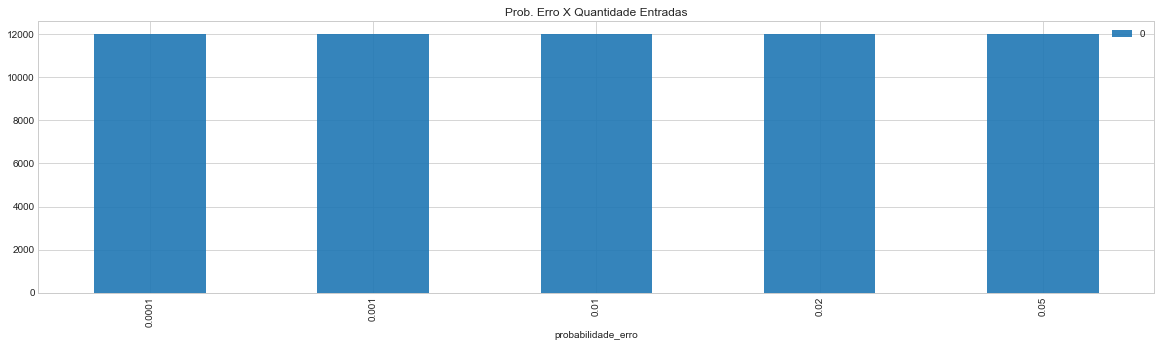

In [26]:
temp.plot(kind = 'bar', style = 'b', alpha = 0.9, title = "Prob. Erro X Quantidade Entradas", figsize=[20,5] )

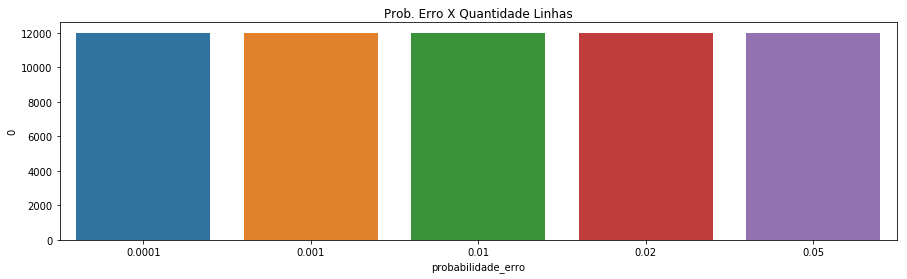

In [27]:
sns.reset_orig()
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')


fig = plt.figure(figsize=[15,4])
plt.title('Prob. Erro X Quantidade Linhas')
sns.barplot(data=temp, x=temp.index, y=temp.columns[0]) #, hue=temp.index )



In [28]:
# numero de amostras de cada size_of_array
temp = df.groupby('size_of_array').size()
temp

size_of_array
100      12000
1000     24000
10000    24000
dtype: int64

In [29]:
#quantas linhas existem para cada 'size_of_array', 'probabilidade_erro','algoritmo'
temp = df.groupby(['size_of_array', 'probabilidade_erro']).size()
temp

size_of_array  probabilidade_erro
100            0.0100                 4000
               0.0200                 4000
               0.0500                 4000
1000           0.0010                12000
               0.0100                 4000
               0.0200                 4000
               0.0500                 4000
10000          0.0001                12000
               0.0100                 4000
               0.0200                 4000
               0.0500                 4000
dtype: int64

In [139]:
fig = plt.figure(figsize=[20,30])
# temp = temp.add_suffix('_Count').reset_index()
temp = pd.DataFrame(data=temp, columns=temp.columns )


# temp.plot(kind = 'bar', style = 'b', alpha = 0.4, title = "Total Values for Country")
# sns.barplot(data=temp, x=temp['probabilidade_erro'])
#temp['probabilidade_erro']
# ax = sns.distplot(temp)

In [30]:
df.head()

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
48000,bubble,0.0001,10000,9846,4,0.04,98.46
48001,bubble,0.0001,10000,6313,3,0.03,63.13
48002,bubble,0.0001,10000,5404,8,0.08,54.04
48003,bubble,0.0001,10000,9501,5,0.05,95.01
48004,bubble,0.0001,10000,9766,8,0.08,97.66


In [28]:
#df.to_csv('_dados_para_analisar.csv', index=False, sep=';')